# Simple Genetic Algorithm
This notebook contains a genetic algorithm trying to reach a sentence (optimum DNA) from random strings over generations with help of mating, crossover and mutation.

# Outline of notebook
#### 1 - Initialize 
	- Start N random DNA’ed sentences with fixed length
#### 2 - Selection
	- Calculate fitness for each sentences
	- Create mating pool wrt fitness scores
#### 3 - Reproduce
	- Select 2 parents
    - Crossover
    - Mutation
    - Add new child to population
#### 4 - Replace (main part)
    - Replace old population with new
	- Return to step 2 (N times).
#### 5 - Plots
    - Some plots to see progress over generations

## 1 - Initialize
    - N random sentences are created with fixed length of given sentence.
    - Only lowercase letters and space.

In [1]:
from matplotlib import pyplot as plt
from random import randint
from numpy.random import choice
import random, string
from numpy import mean
import time
import numpy as np

#all_chars = string.ascii_uppercase + string.ascii_lowercase + string.digits + " "
all_chars = string.ascii_lowercase + " "

In [2]:
def generate_random_sentence(fix_len,all_chars):
    return ''.join(random.choice(all_chars) for _ in range(fix_len))

def initialize(real_sentence,N):
    fix_len = len(real_sentence)
    population = []
    
    for i in range(N):
        sentence = generate_random_sentence(fix_len,all_chars)
        population.append(sentence)
    return population

# 2 - Selection

- Calculate fitness
- Create mating pool wrt fitness scores.

In [3]:
def fitness(sen1, sen2):
    if len(sen1) != len(sen2):
        print("Error, length of sentences must be the same.\nSentence 1: " + sen1 +"\nSentence 2: " + sen2)
        return -1,-1
    score = 0
    for ind,elem in enumerate(sen1):
        if sen2[ind] == elem:
            score += 1
    percentage_score = 1.0*score/len(sen1)
    return score, percentage_score

In [4]:
fitness("ahmet", 'ahmak')

(3, 0.6)

In [5]:
def selection(population,real_sentence):
    current_total_score = 0
    list_of_scores = []

    for sentence in population:
        score, percentage_score = fitness(real_sentence,sentence)
        current_total_score += score*score
        list_of_scores.append(score)
    
    # Probability distribution by "squares of points". 
    prob_dist = [(x*x) / current_total_score for x in list_of_scores]
    return list_of_scores, prob_dist

# 3 - Reproduce N times
    - Pick 2 parents
    - Crossover
    - Mutation
    - Add new child to new population

In [6]:
def crossover(sen1,sen2):
    # 3 to 10 crossover points
    n_co_points = min(len(sen1)/2, random.randrange(3,10))
    co_points = sorted(random.sample(range(1, len(sen1)), n_co_points))
    
    res = ""
    prev = 0
    for ind, co_point in enumerate(co_points):
        if ind%2:
            res += sen1[prev:co_point]
        else:
            res += sen2[prev:co_point]
        prev = co_point
    res += sen2[prev:]
    return res   
    
def mutation(sentence, percentage):
    
    for ind,elem in enumerate(sentence):
        rand = random.random()*10000
        if rand<=percentage*100:
            rand_char = ''.join(random.choice(all_chars))
            sentence = sentence[:ind] + rand_char[0] + sentence[ind+1:]
    
    return sentence

In [7]:
def reproduce(population,list_of_scores,mutation_percentage=1):
    
    avg_generation_score = mean(list_of_scores)
    new_population = []
    # All draws at once for efficiency
    draw = choice(population, 2*N, p=prob_dist)
    
    for i in range(N):
        child = crossover(draw[2*i],draw[2*i+1])
        child = mutation(child,mutation_percentage)
        new_population.append(child)
    
    return avg_generation_score, new_population

In [8]:
def sort_together(list1,list2):
    list1, list2 = zip(*sorted(zip(list1, list2),reverse=True))
    return list1,list2

# 4 - Replace (main part)
    This is the main part of the algorithm where all methods are called.
    - Initialize
    - Selection
    - Reproduction
    - Replace for the next generation
    - Go to "selection" part

In [9]:
t_start = time.time()

# Number of generations
n_generations = 250
# Size of the population
N = 1000
# Optimum DNA
real_sentence = "a creative man is motivated by the desire to achieve not by the desire to beat others"
# Mutation percentage (pick between 0 and 100)
mut_per = 0.01

print('Real sentence:',real_sentence)
print('\nLength of real sentence:',len(real_sentence))
print()
print('# of generations:',n_generations)
print('Population:',N)
print('Mutation percentage: %',mut_per)
print()

#Initialize
population = initialize(real_sentence,N)

# Lists below are only for reporting some generations
all_scores = []
avg_scores = []
best_sentences = []
best_scores    = []
worst_sentences= []
worst_scores   = []

for i in range(n_generations+1):

    # Selection
    list_of_scores, prob_dist = selection(population,real_sentence)
    sorted_scores,sorted_sentences = sort_together(list_of_scores,population)

    # Reproduction
    avg_generation_score, new_population = reproduce(population,list_of_scores,mut_per)

    # Replace
    population = new_population
    
    # Report some generations
    if(i%(n_generations/10)==0):
        all_scores.append(sorted_scores)
        
        best_scores.append(sorted_scores[0])
        best_sentences.append(sorted_sentences[0])
        
        worst_scores.append(sorted_scores[-1])
        worst_sentences.append(sorted_sentences[-1])
        
        avg_scores.append(avg_generation_score)

        print(i,'th gen.\tAvg:',avg_generation_score,'\tBest:',sorted_scores[:4],
              '\tWorst:',sorted_scores[-4:])
        
t_end = time.time()
print('\nRuntime:',(t_end-t_start),'seconds')

Real sentence: a creative man is motivated by the desire to achieve not by the desire to beat others

Length of real sentence: 85

# of generations: 250
Population: 1000
Mutation percentage: % 0.01

0 th gen.	Avg: 3.148 	Best: (10, 9, 9, 9) 	Worst: (0, 0, 0, 0)
25 th gen.	Avg: 32.38 	Best: (45, 44, 43, 43) 	Worst: (22, 21, 21, 21)
50 th gen.	Avg: 51.626 	Best: (63, 62, 62, 61) 	Worst: (41, 40, 39, 39)
75 th gen.	Avg: 63.056 	Best: (74, 73, 72, 71) 	Worst: (53, 52, 52, 52)
100 th gen.	Avg: 70.562 	Best: (79, 79, 79, 79) 	Worst: (62, 62, 62, 61)
125 th gen.	Avg: 75.69 	Best: (82, 81, 81, 81) 	Worst: (69, 68, 68, 68)
150 th gen.	Avg: 78.686 	Best: (84, 84, 83, 83) 	Worst: (73, 73, 73, 72)
175 th gen.	Avg: 80.486 	Best: (84, 84, 84, 83) 	Worst: (76, 76, 75, 74)
200 th gen.	Avg: 81.329 	Best: (84, 84, 84, 84) 	Worst: (77, 77, 77, 76)
225 th gen.	Avg: 81.862 	Best: (84, 84, 84, 84) 	Worst: (78, 78, 78, 78)
250 th gen.	Avg: 82.427 	Best: (84, 84, 84, 84) 	Worst: (80, 80, 79, 79)

Runtime: 24.

In [10]:
list_of_scores, prob_dist = selection(population,real_sentence)
sorted_scores, sorted_sentences = sort_together(list_of_scores, population)
sorted_sentences[:5]

('f creative man is motivated by the desire to achieve not by the desire to beat others',
 'f creative man is motivated by the desire to achieve not by the desire to beat others',
 'f creative man is motivated by the desire to achieve not by the desire to beat others',
 'f creative man is motivated by the desire to achieve not by the desire to beat others',
 'f creative man is motivated by the desire to achieve not by the desire to beat others')

## Best and worst sentences over generations

In [11]:
print("Best sentences over generations:\n")
for i in range(len(best_sentences)):
    print(int(i*(n_generations/10)),'\t',best_sentences[i])

Best sentences over generations:

0 	 lqpzzrjixklplubjngioqrazoprl kjqkzelmsbdpqnohsfaqovceqncomy faeuy apttamcnvqatouckqgt
25 	 asczhahmvh macnssnmodivntutpbyjphufzescnv tohacaieeeitot ec rue desore oo fqat otfycv
50 	 f crgajive mad is momivatjjpby thjodusirh bo byhceve tot by the dedire do weat obyers
75 	 fscreatfve man is motivatfl by thl desiro to achievienot by the desire tm beat otyers
100 	 f crhative aan is motivated by the dusiro to achieve not by the desire to beat otyers
125 	 f creative man is motivated by the desirq to achieve not by the desire to beat otyers
150 	 f creative man is motivated by the desire to achieve not by the desire to beat others
175 	 f creative man is motivated by the desire to achieve not by the desire to beat others
200 	 f creative man is motivated by the desire to achieve not by the desire to beat others
225 	 f creative man is motivated by the desire to achieve not by the desire to beat others
250 	 f creative man is motivated by the desire to 

In [12]:
print("Worst sentences over generations:\n")
for i in range(len(worst_sentences)):
    print(int(i*(n_generations/10)),'\t',worst_sentences[i])

Worst sentences over generations:

0 	  pjckerdfzxiyulqdzsbebaexbfkzsbbpudrcbrlucaucvrkldftctlocyuxjvne hkoyuzupirwqodnzgzem
25 	 kwccqaymms rdnuxnhlbka stujrqypfhgqsvviejnmxeacvwereeqot tyy axzdjsvwfboomfeda  wlvfq
50 	 ulcfqajrvhiaavnsdzmotytatfdmbx thwpdhjfrx nohkhlceve qat ms rhe dedirebto qqau owccnb
75 	 f crkatila mat iszmklipatudwoy thezzesirxsmo am rjcdpnot by tpetdesirezdmqweat owyers
100 	 c crhajsvm man ss motivaibcyby thekdeserx to achizve nst my fae desiae lo beot owheoc
125 	 c caeaiive ran is motivktoj by thwydesirh toeachieve not by the desirezto bezt owyepc
150 	 f crkative tln is mokivatbd byrthe desirv tx ayhieve qot by the desire to beat ogkers
175 	 a co ative aan is mokivatfd by the desirx no achieve not by the desire do beat ogkerr
200 	 f cveavive man is motipated by the desfrv to achieve uot by the dtsire to beat otheos
225 	 f creajive man is motixatbd by the delirx to achieve wot by the desire to beat others
250 	 f crhative man is motivatedhby the desirx to

# Plots
## Best and worst fitness scores over generations

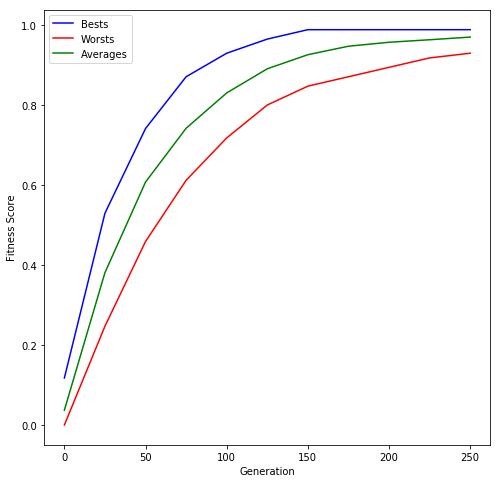

In [13]:
plt.figure(figsize=(8,8))

plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(best_scores)/len(real_sentence),'blue',label='Bests')
plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(worst_scores)/len(real_sentence),'red',label='Worsts')
plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(avg_scores)/len(real_sentence),'green',label="Averages")

plt.legend()
plt.xlabel('Generation')
plt.ylabel('Fitness Score')

plt.show()

## All fitness scores of all sentences over generations

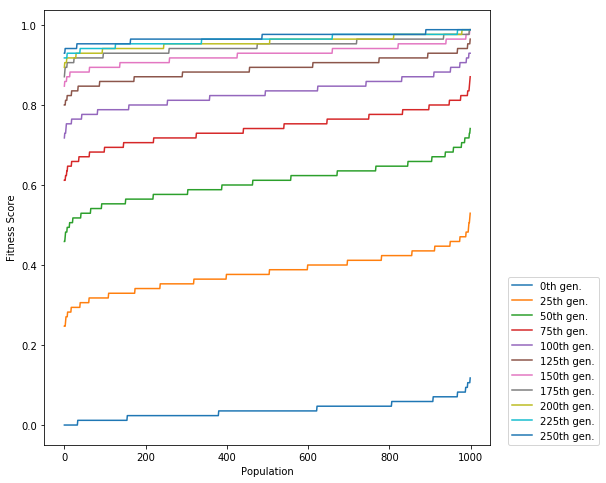

In [14]:
plt.figure(figsize=(8,8))

for ind,elem in enumerate(all_scores):
    inc = np.array(sorted(elem))/len(real_sentence)
    plt.plot(np.arange(N),inc,label=str(int(ind*n_generations/10))+'th gen.')

plt.legend(loc=(1.04,0))
plt.xlabel('Population')
plt.ylabel('Fitness Score')

plt.show()

## Cost is O(L\*G\*P)
- L: lenght of sentence
- G: generation number
- P: population size